In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [66]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [67]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Import the libraries

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

## Detecting the Outlier & Missing value

In [70]:
# 각 column별 결측치의 개수 확인
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치 갖는 attribute 존재하지 않음을 확인했다.

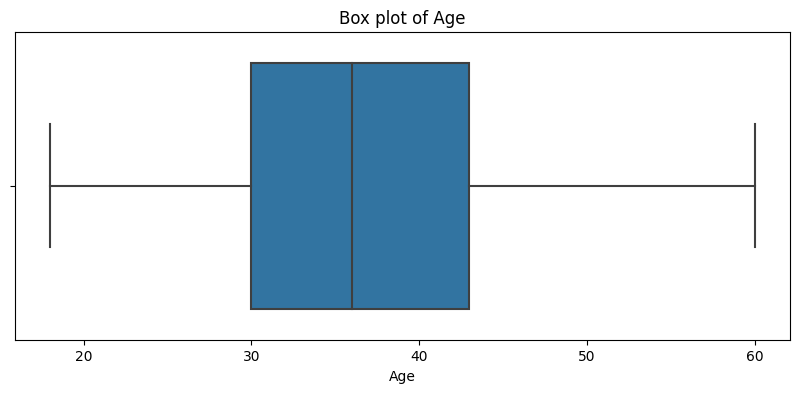

Number of outliers in Age: 0


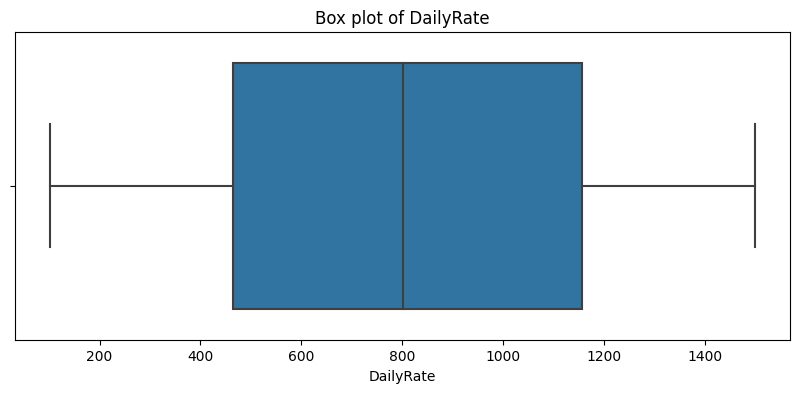

Number of outliers in DailyRate: 0


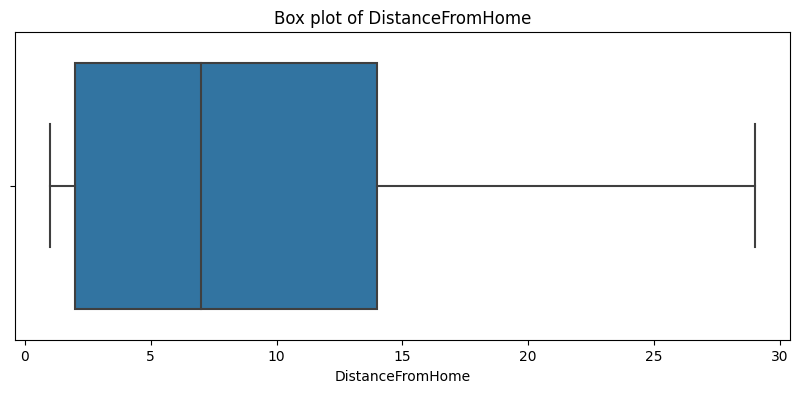

Number of outliers in DistanceFromHome: 0


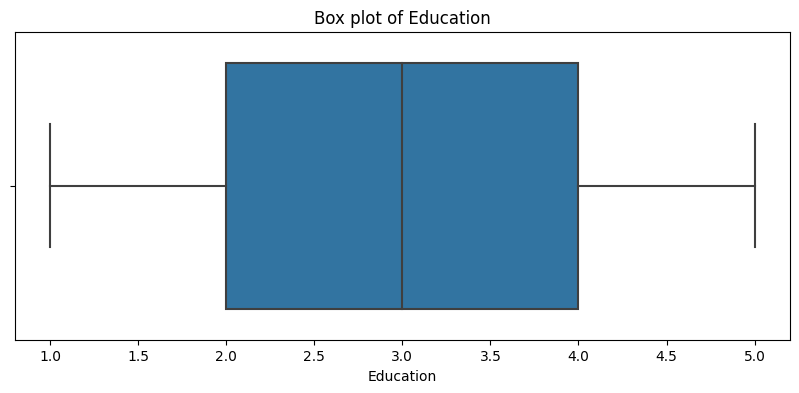

Number of outliers in Education: 0


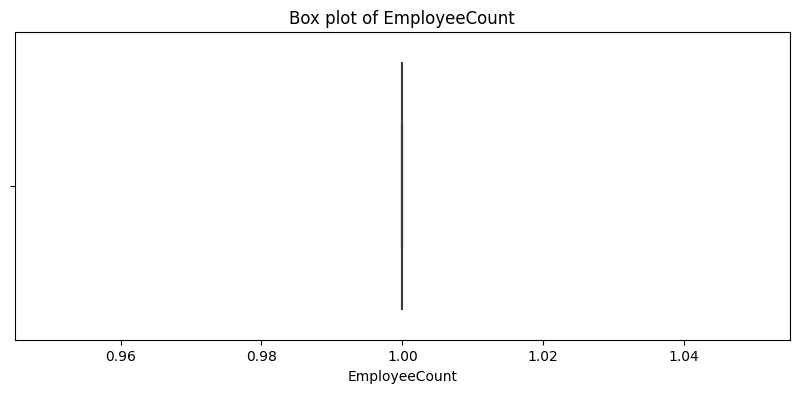

Number of outliers in EmployeeCount: 0


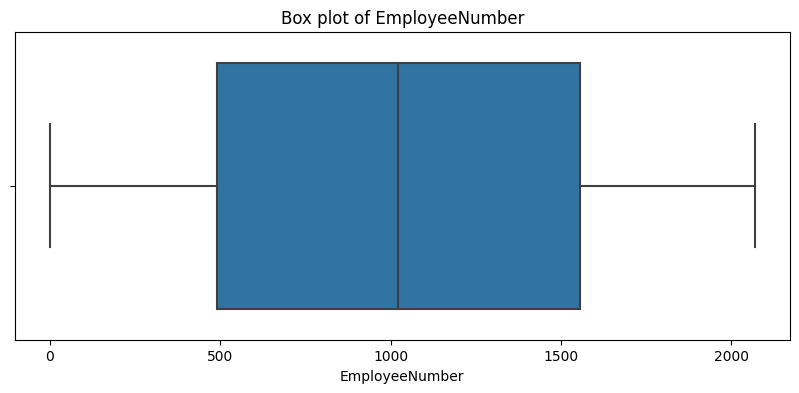

Number of outliers in EmployeeNumber: 0


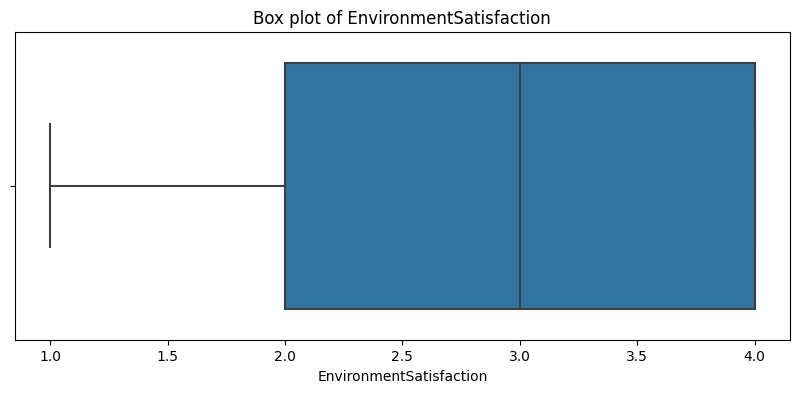

Number of outliers in EnvironmentSatisfaction: 0


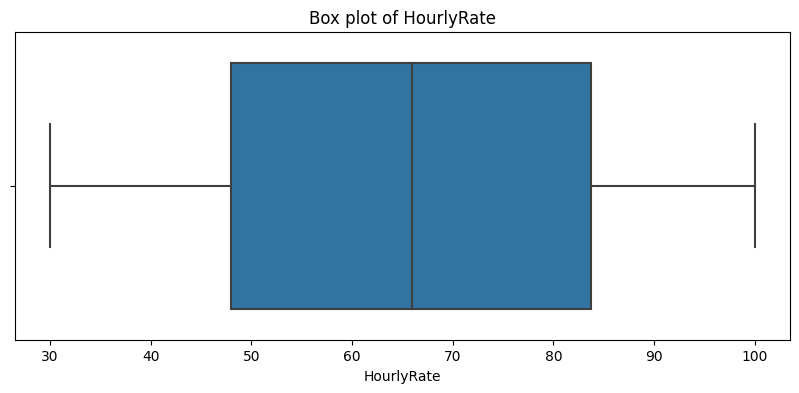

Number of outliers in HourlyRate: 0


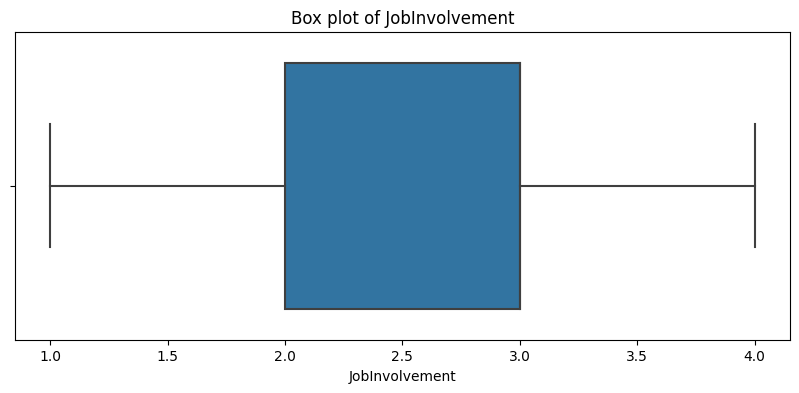

Number of outliers in JobInvolvement: 0


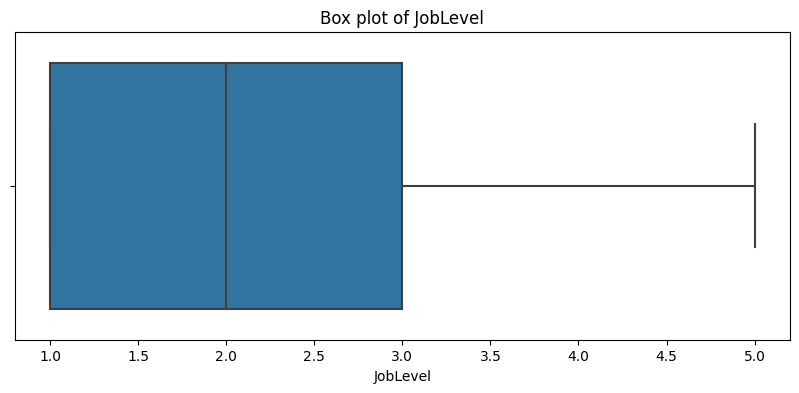

Number of outliers in JobLevel: 0


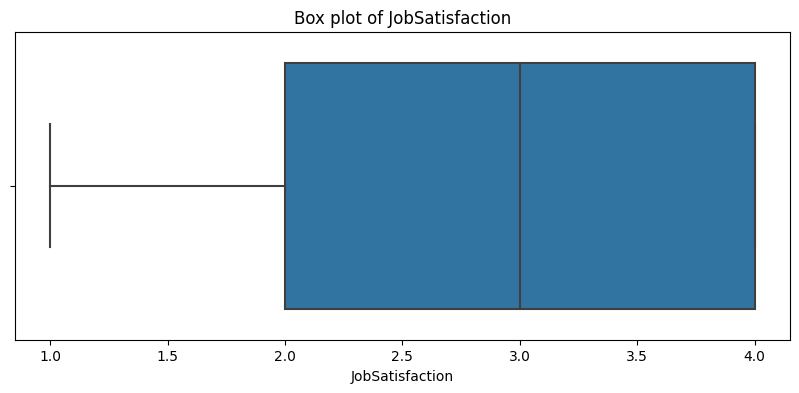

Number of outliers in JobSatisfaction: 0


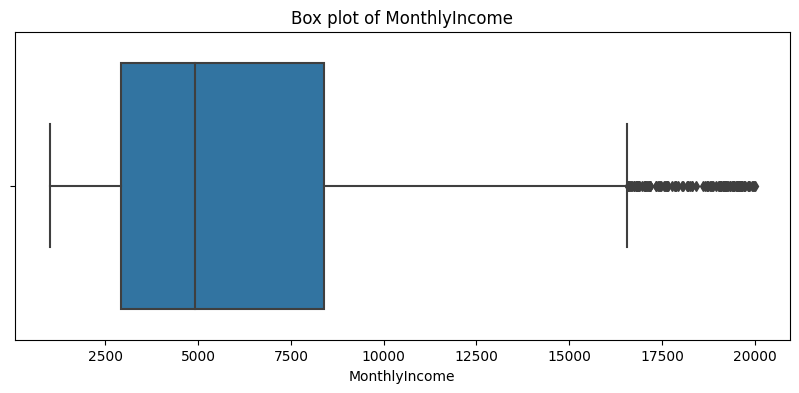

Number of outliers in MonthlyIncome: 0


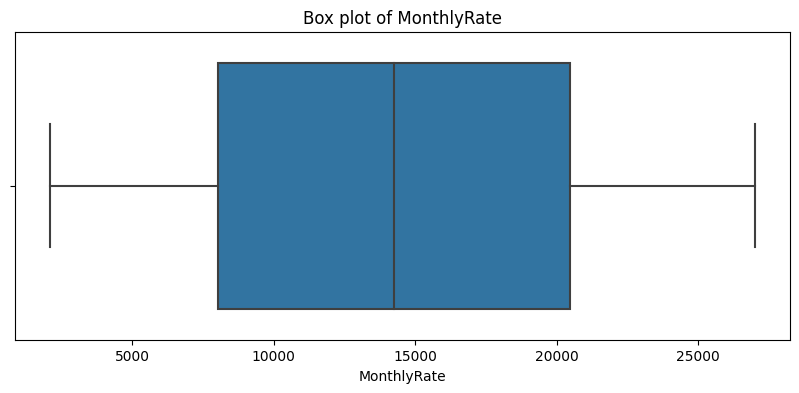

Number of outliers in MonthlyRate: 0


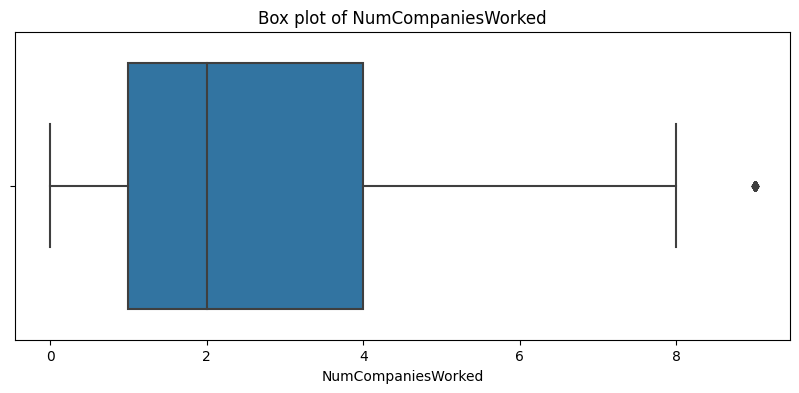

Number of outliers in NumCompaniesWorked: 0


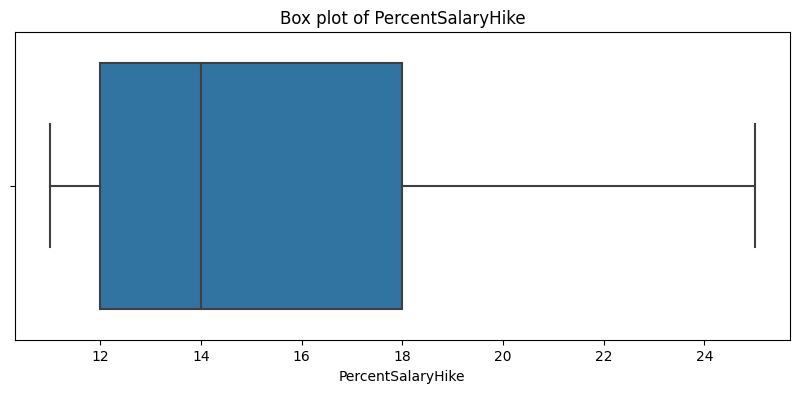

Number of outliers in PercentSalaryHike: 0


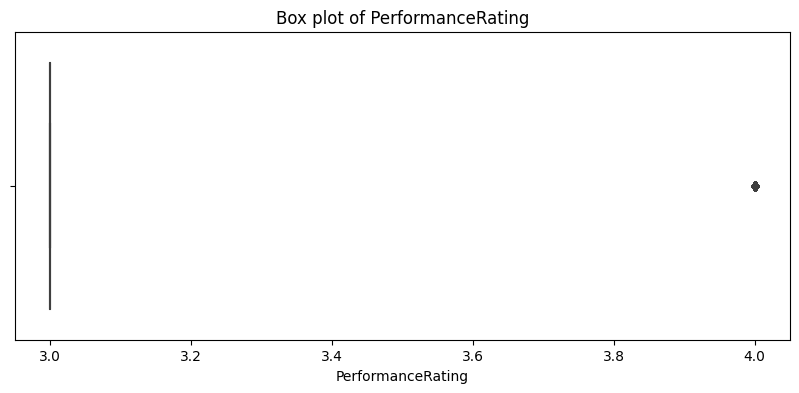

Number of outliers in PerformanceRating: 0


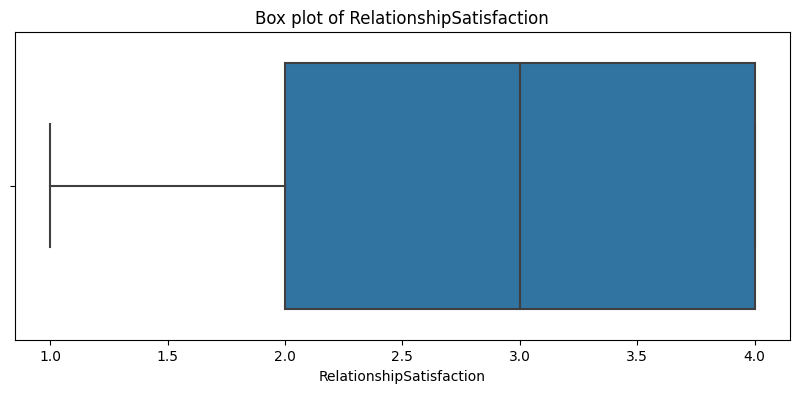

Number of outliers in RelationshipSatisfaction: 0


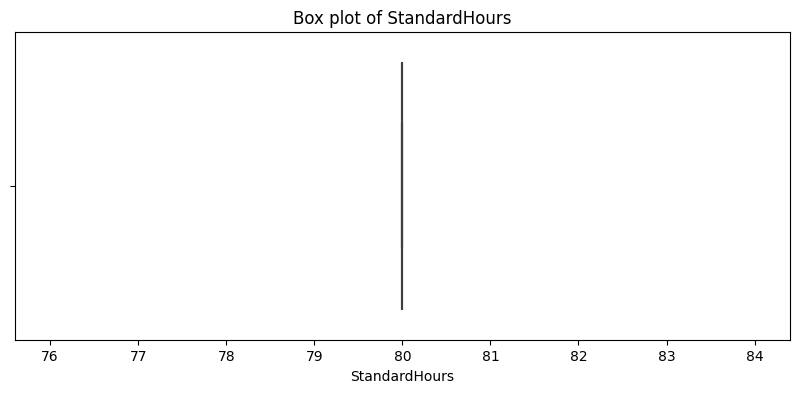

Number of outliers in StandardHours: 0


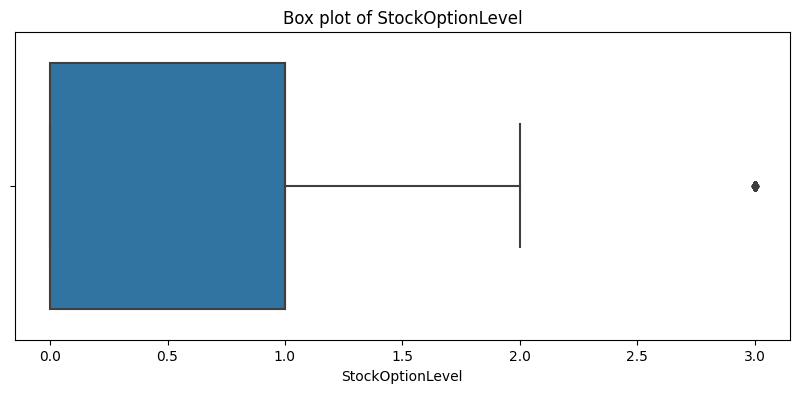

Number of outliers in StockOptionLevel: 0


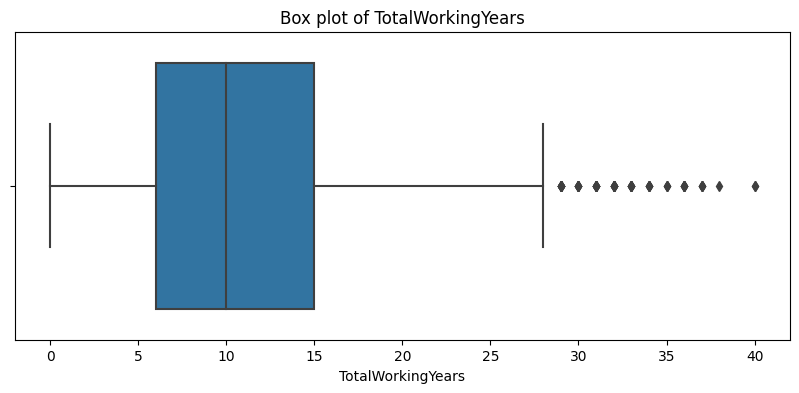

Number of outliers in TotalWorkingYears: 16


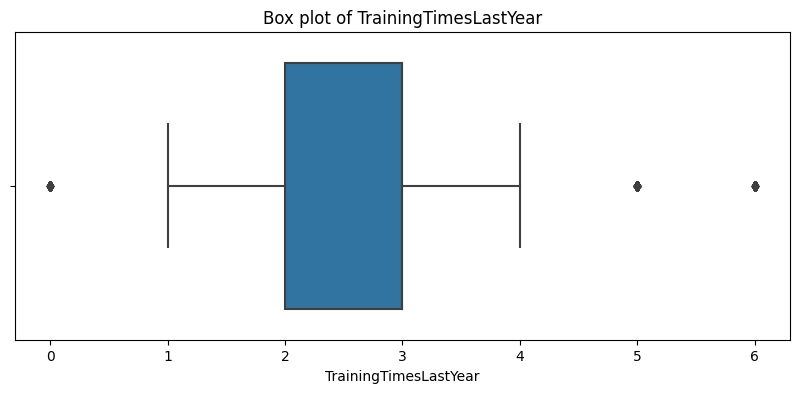

Number of outliers in TrainingTimesLastYear: 0


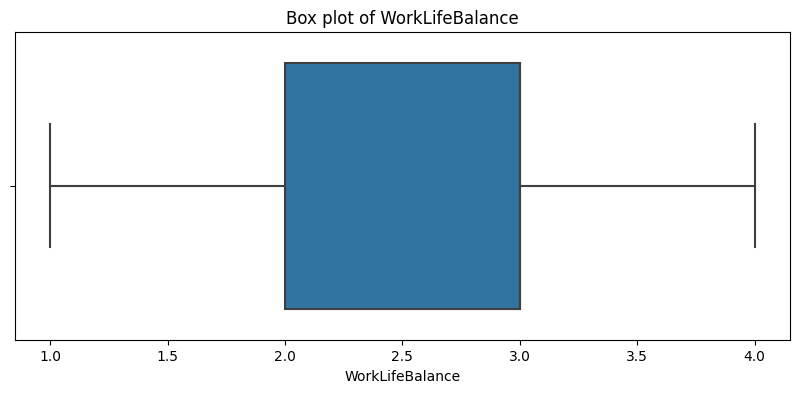

Number of outliers in WorkLifeBalance: 0


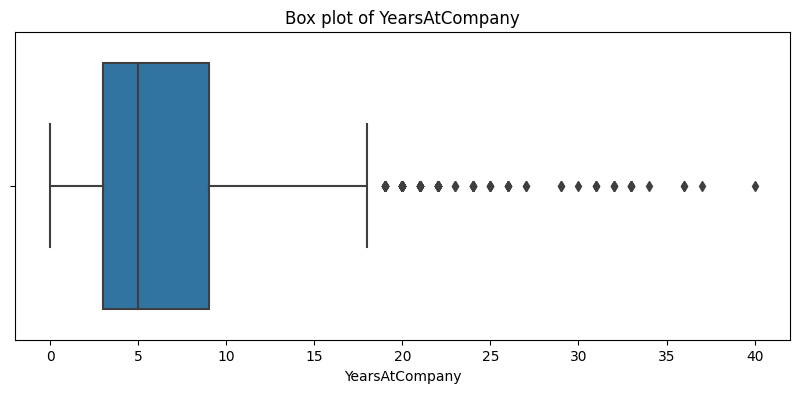

Number of outliers in YearsAtCompany: 25


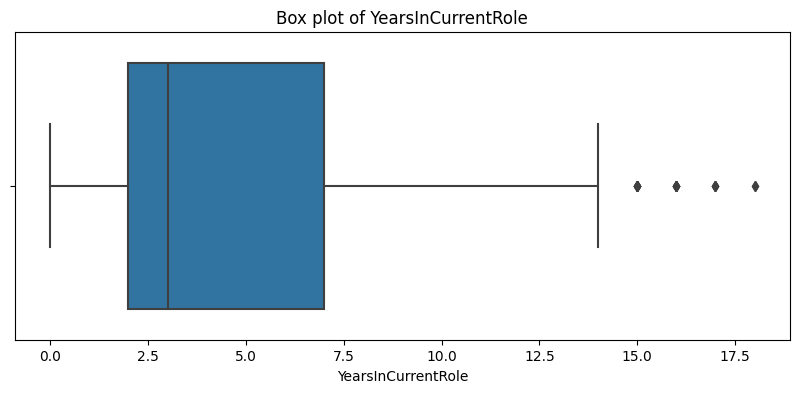

Number of outliers in YearsInCurrentRole: 13


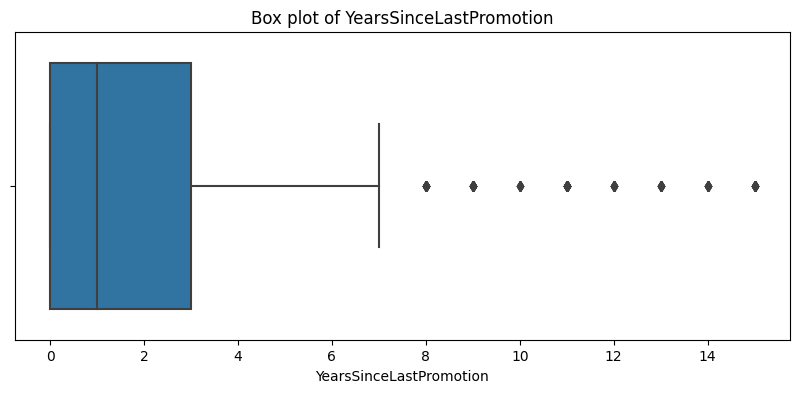

Number of outliers in YearsSinceLastPromotion: 42


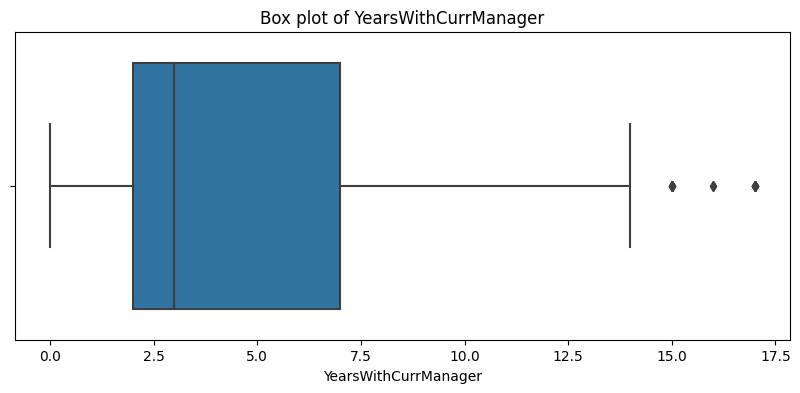

Number of outliers in YearsWithCurrManager: 14

Frequency distribution of Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Frequency distribution of BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Frequency distribution of Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Frequency distribution of EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Frequency distribution of Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Frequency distribution of JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative  

In [71]:
# 수치형 변수와 범주형 변수 분리
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 수치형 변수에 대한 이상치 탐지
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

    # Z-점수 계산
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    outlier_mask = abs_z_scores > 3
    print(f"Number of outliers in {col}: {sum(outlier_mask)}")

# 범주형 변수에 대한 이상치 탐지
for col in categorical_cols:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts())

이상치 제거

In [72]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# 이상치가 있는 Column 목록
outlier_columns = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# 각 Column에 대해 이상치 제거
for col in outlier_columns:
    data = remove_outliers(df, col)

### 수치형 변수 상관관계

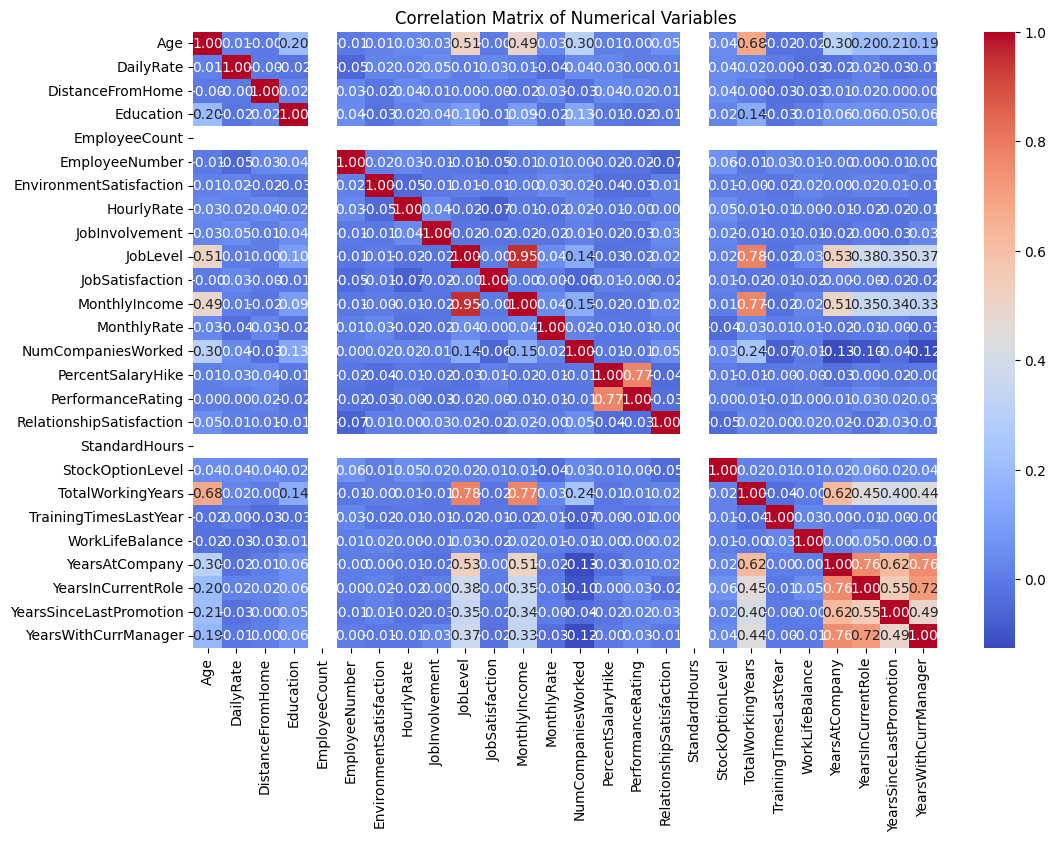

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 계수 heatmap
corr_matrix = data[numerical_cols].corr()

# 상관 계수 heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

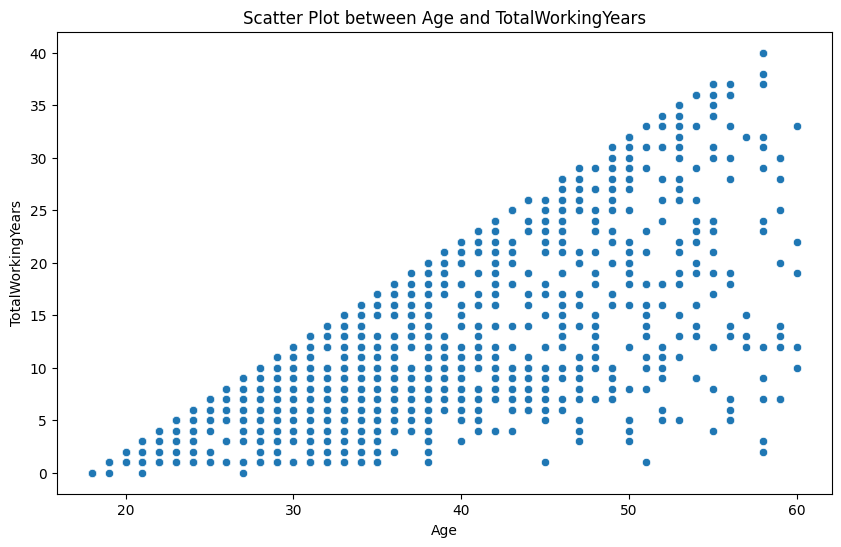

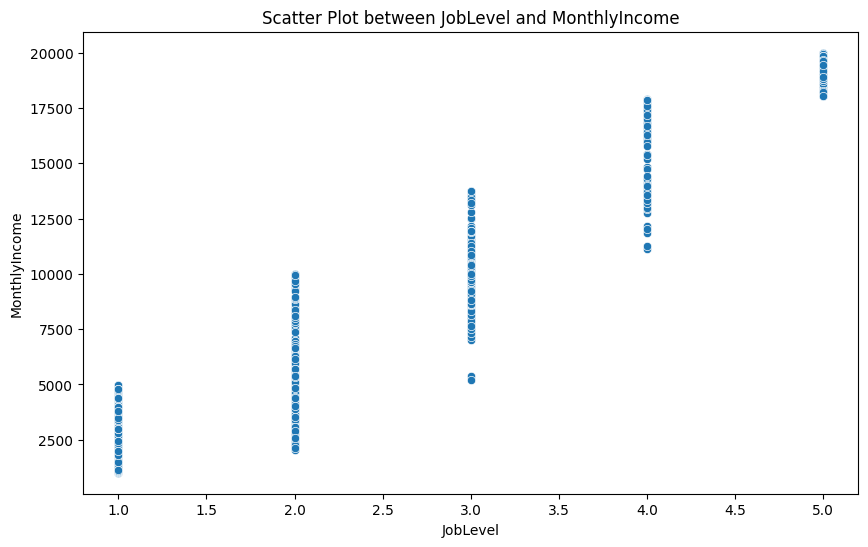

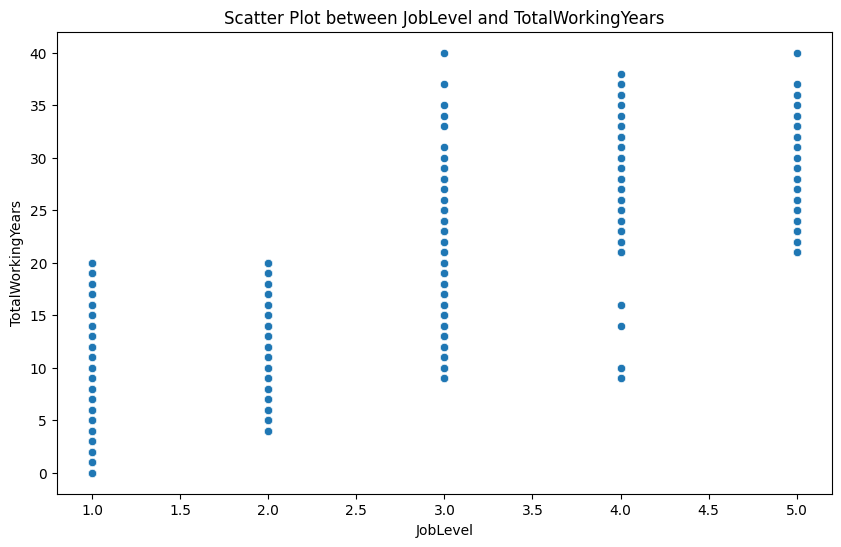

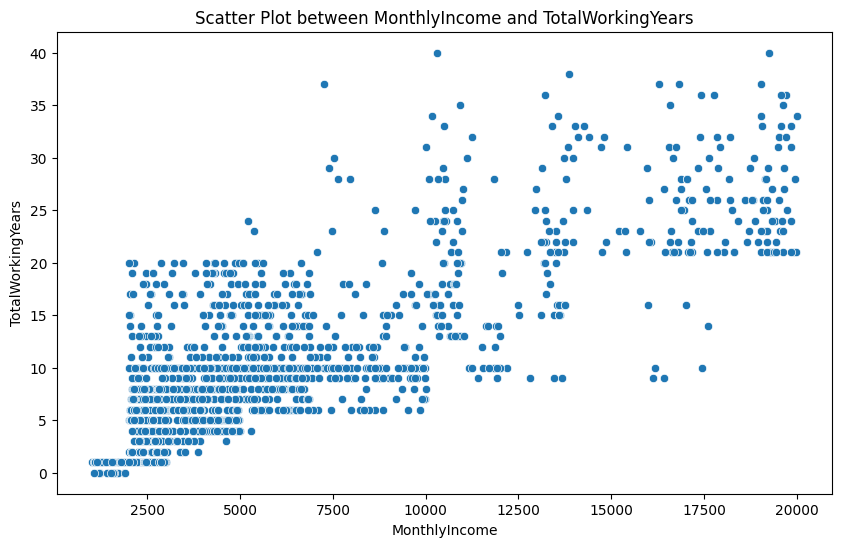

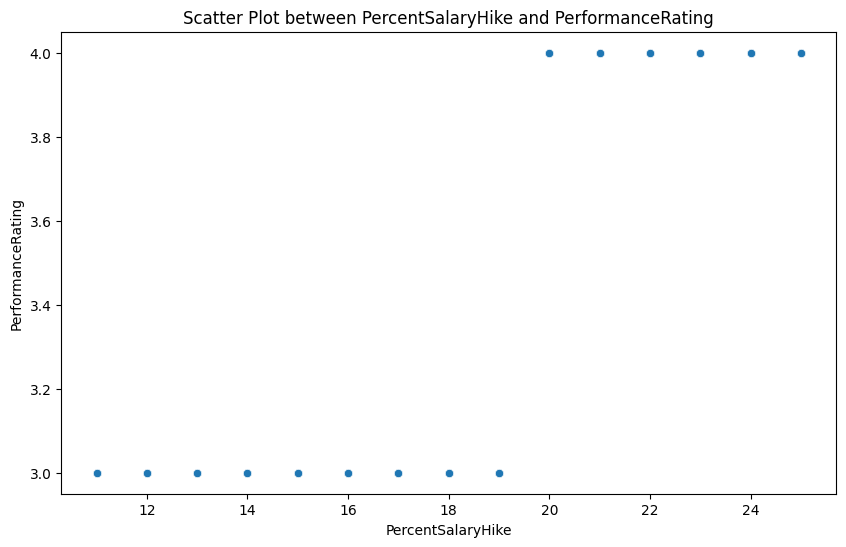

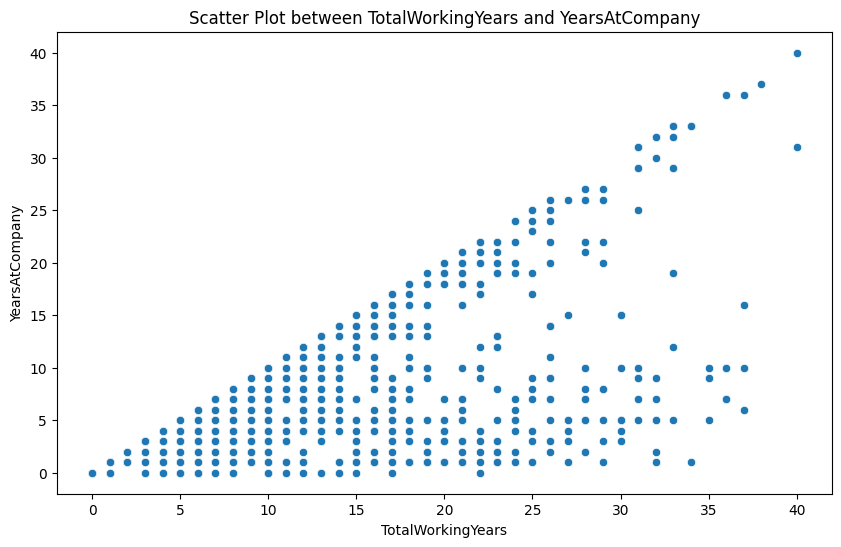

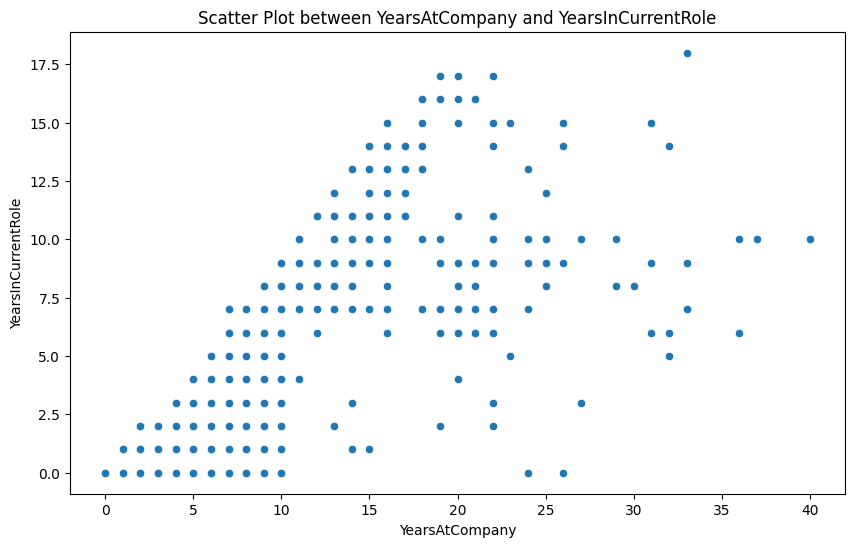

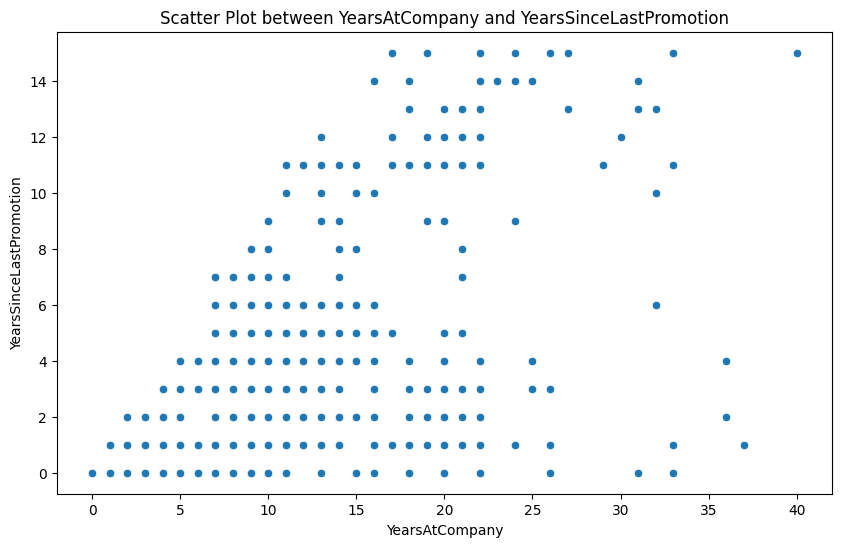

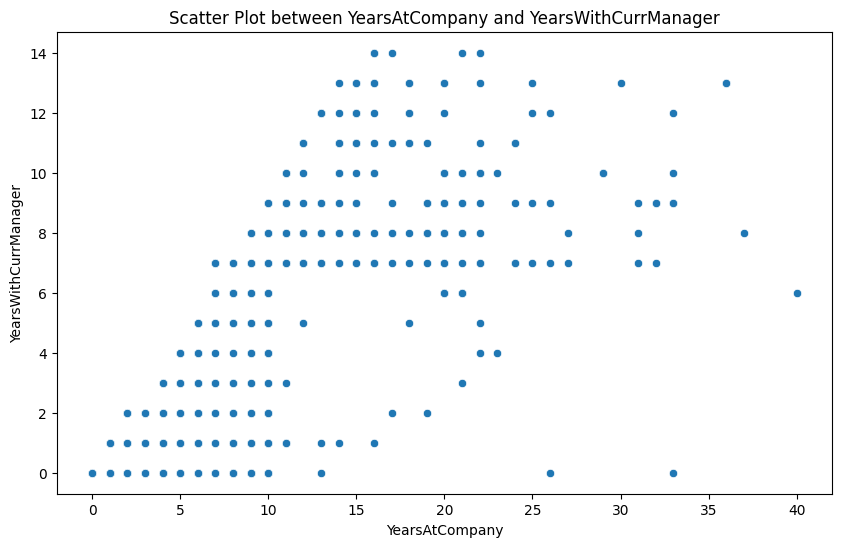

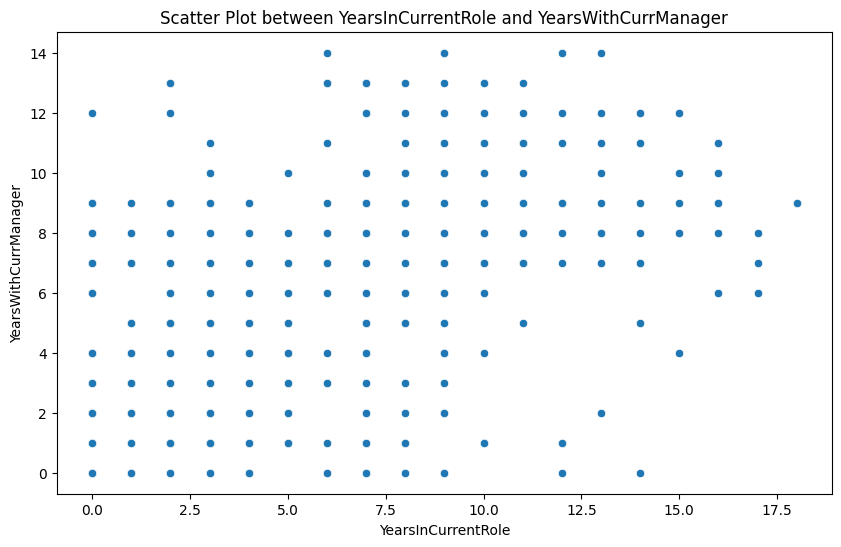

In [74]:
# 상관관계가 0.6 이상인 변수 쌍 추출
high_corr_var = np.where(corr_matrix > 0.6)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 상관관계가 높은 변수 쌍의 분포를 시각화
for var_pair in high_corr_var:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=var_pair[0], y=var_pair[1])
    plt.title(f'Scatter Plot between {var_pair[0]} and {var_pair[1]}')
    plt.show()

## Attribution rate
주요 분석 대상 변수를 'attribution'으로 하고자 함.

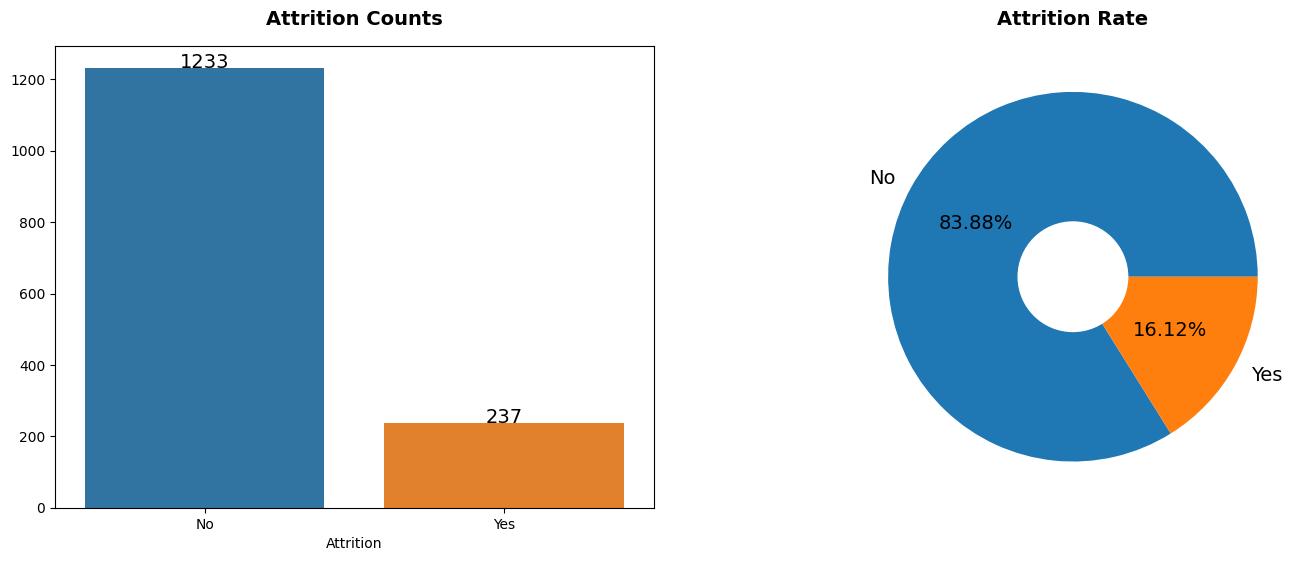

In [75]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values)
plt.title("Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)
    
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14})
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

In [76]:
def pie_bar_plot(df, col, hue=None):
    plt.figure(figsize=(14, 7))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    plt.title(f"Distribution of {col}", fontweight="bold", size=14, pad=15)
    colors = sns.color_palette('pastel', len(value_counts))
    wedges, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct="%.1f%%",
                                       pctdistance=0.85, startangle=90, colors=colors, textprops={"fontsize":12})
    
    # Draw a circle at the center to transform it into a donut chart
    plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))
    
    # Second subplot: Bar chart
    plt.subplot(1, 2, 2)
    if hue:
        sns.countplot(x=col, hue=hue, data=df, palette='pastel')
    else:
        sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Count of {col}", fontweight="bold", size=14)
    plt.xticks(rotation=45)
    
    # Autotexts are the percentage labels on the pie chart, here we set their font size
    for autotext in autotexts:
        autotext.set_color('gray')
        autotext.set_fontsize('13')
        autotext.set_weight('bold')
    
    plt.tight_layout()
    plt.show()

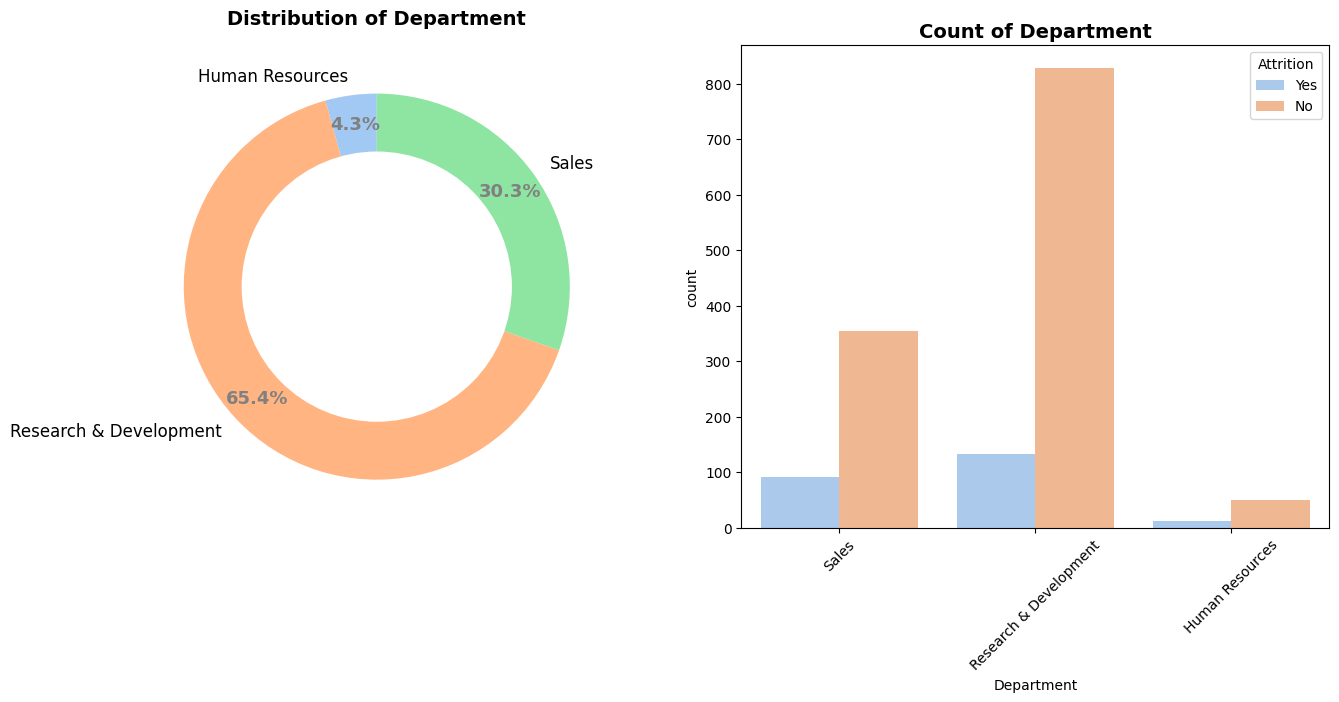

In [77]:
pie_bar_plot(df, 'Department', hue='Attrition')

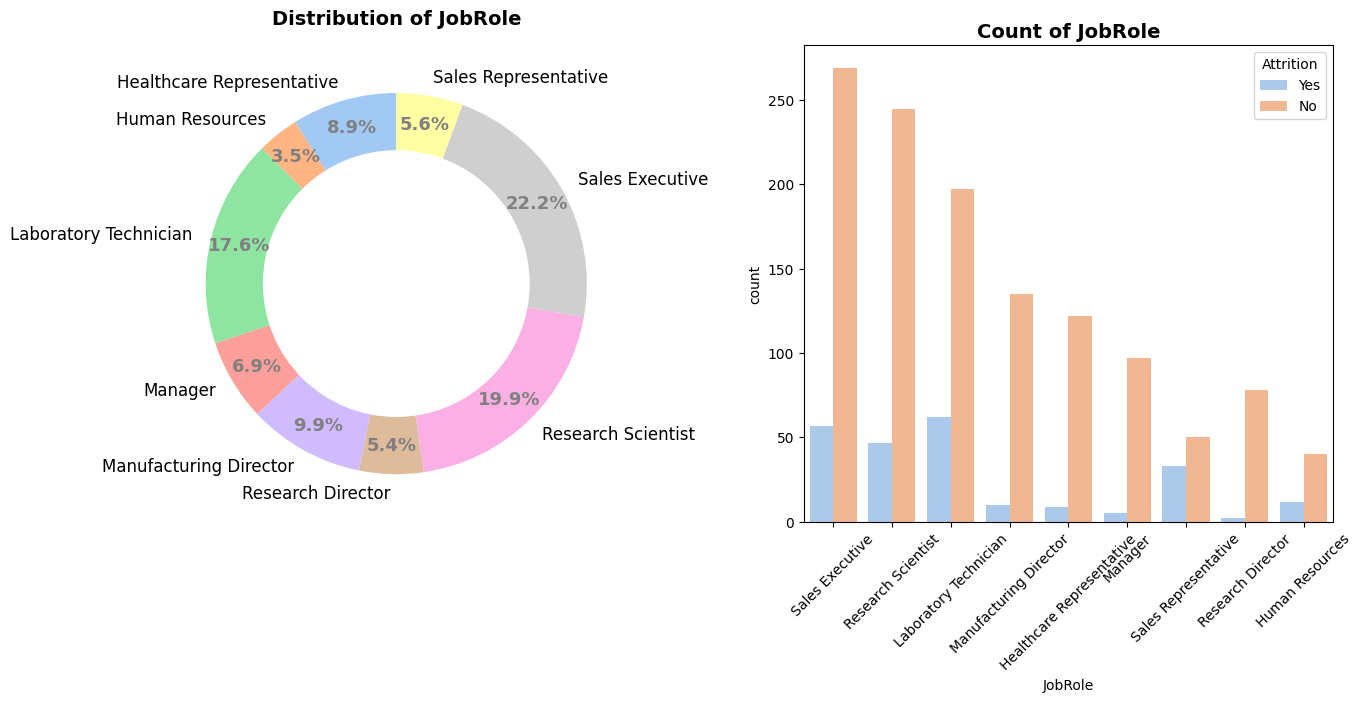

In [78]:
pie_bar_plot(df, 'JobRole', hue='Attrition')

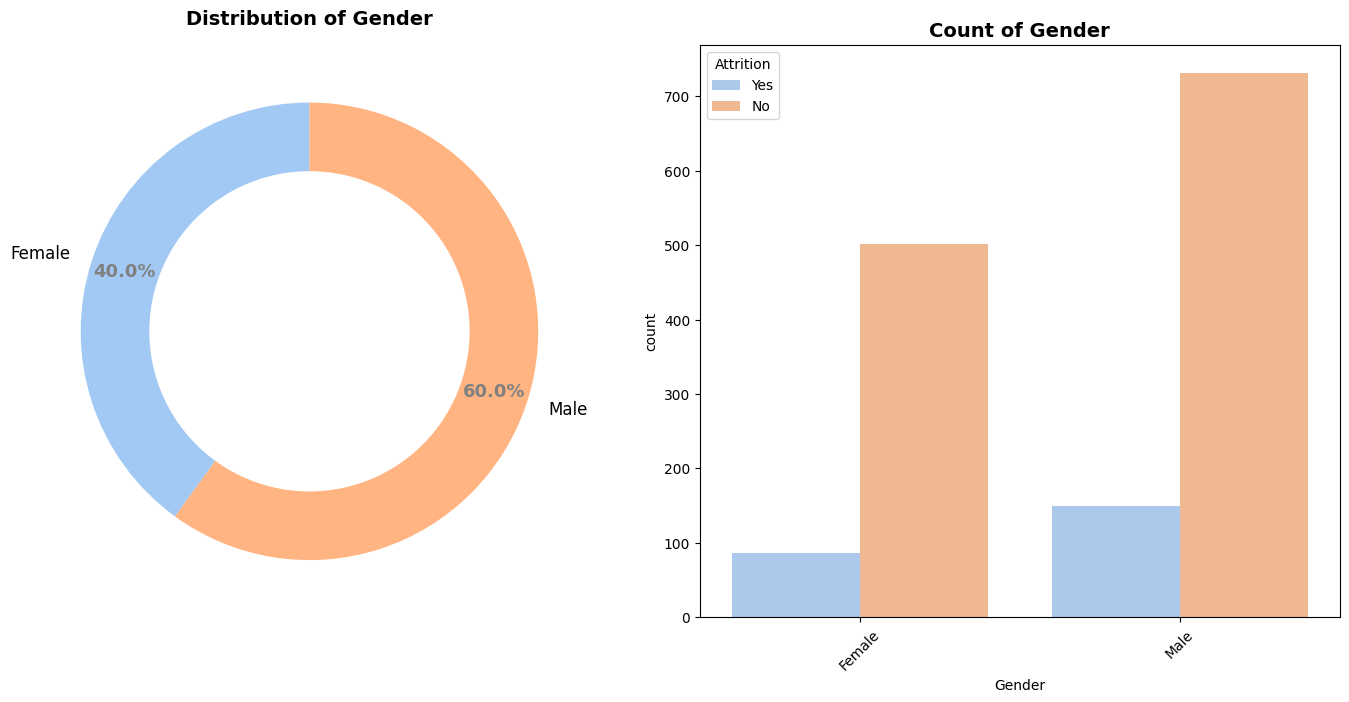

In [79]:
pie_bar_plot(df, 'Gender', hue='Attrition')

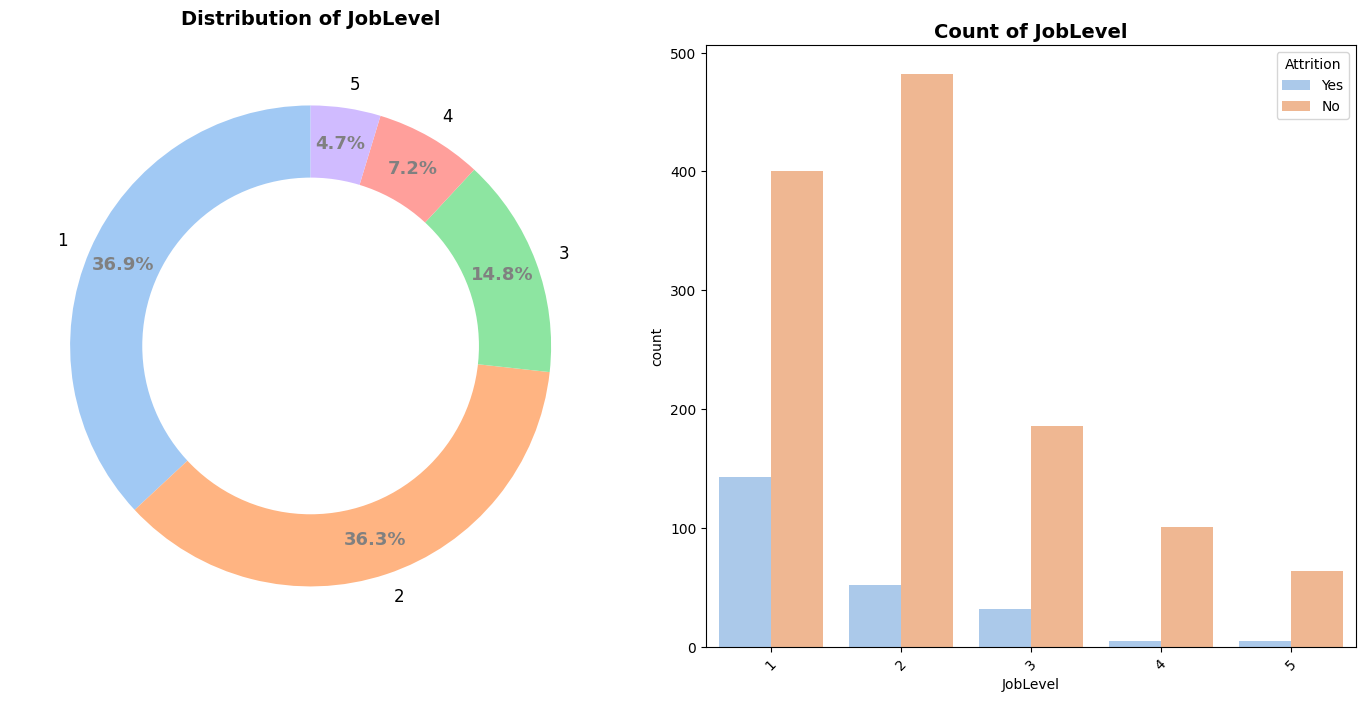

In [80]:
pie_bar_plot(df, 'JobLevel', hue='Attrition')

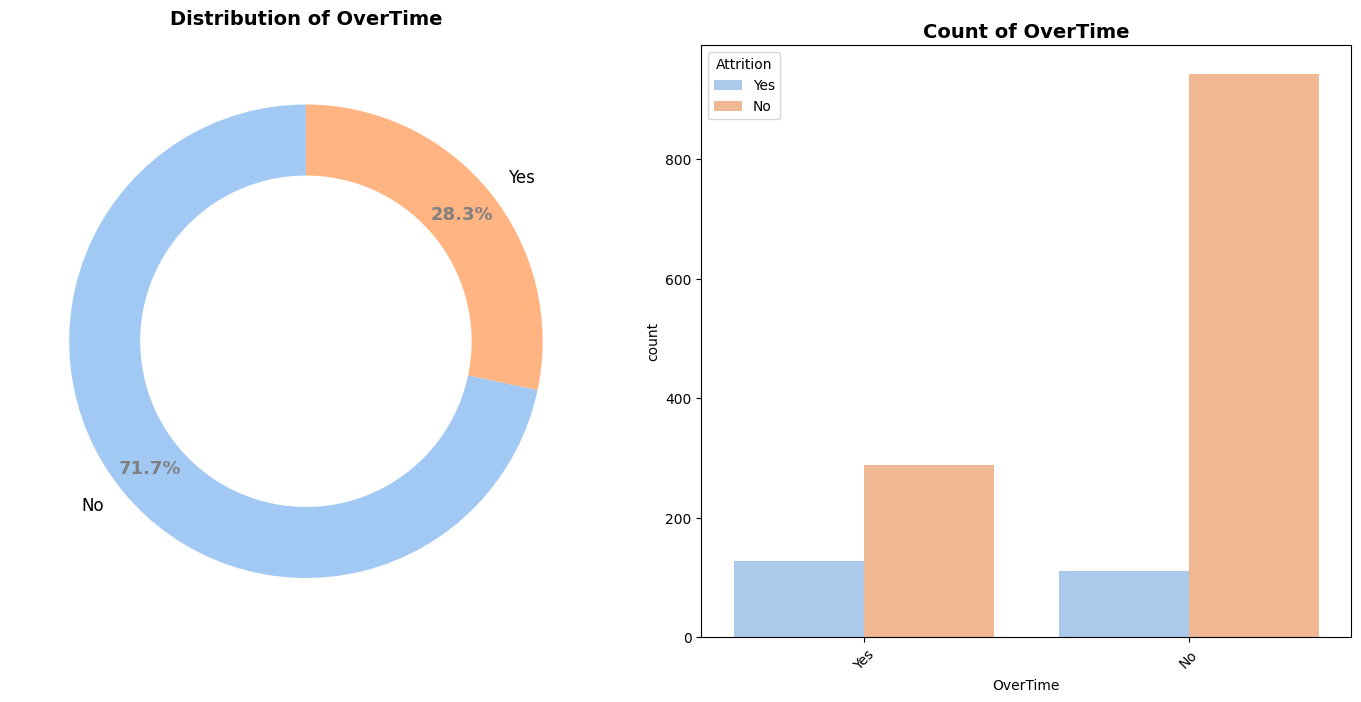

In [81]:
pie_bar_plot(df, 'OverTime', hue='Attrition')

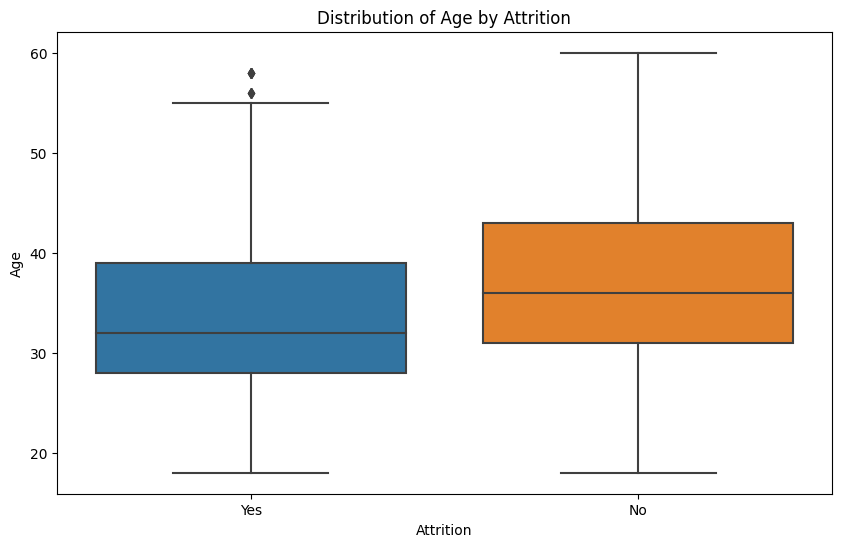

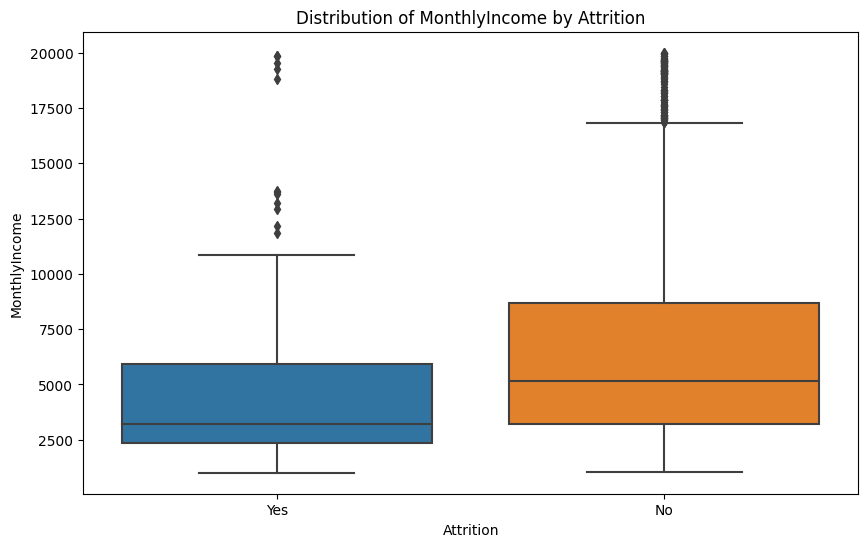

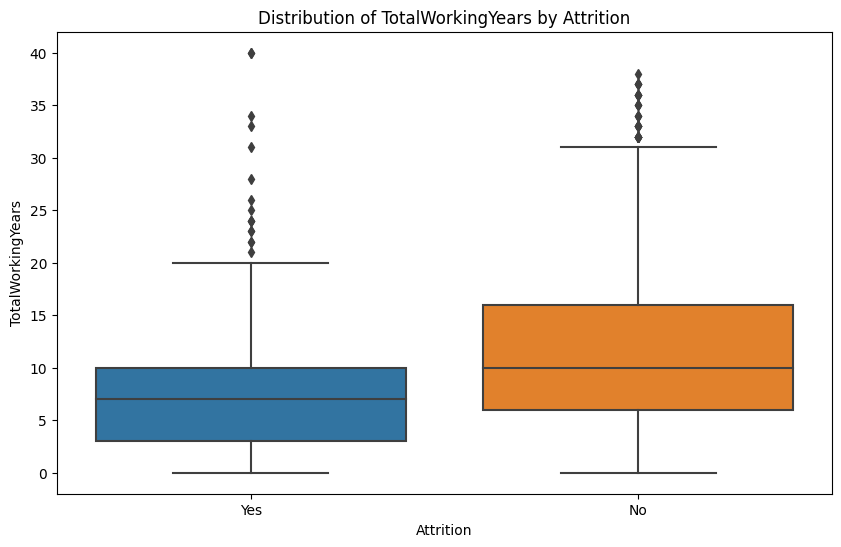

In [82]:
# 범주별 분석을 수행할 수치형 변수 선택
analysis_columns = ['Age', 'MonthlyIncome', 'TotalWorkingYears']

# 각 수치형 변수에 대해 범주별 분석 수행
for col in analysis_columns:
    plot_distribution(data, col)

### 파생변수 생성

In [83]:
# Define the derived variables

# 1. Age Group
df['AgeGroup'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60], labels=['18-29', '30-39', '40-49', '50-59'])

# 2. Total Years at Company
df['TotalYearsAtCompany'] = df[['YearsAtCompany', 'YearsInCurrentRole', 
                                    'YearsSinceLastPromotion', 'YearsWithCurrManager']].sum(axis=1)

# 3. Income Per Year
df['IncomePerYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 0.1)

df[['AgeGroup', 'TotalYearsAtCompany', 'IncomePerYear']].head()


# We will exclude rows where 'TotalWorkingYears' is 0 before calculating 'IncomePerYear'

data_filtered=df.loc[df['TotalWorkingYears'] != 0, 'IncomePerYear'] = df.loc[df['TotalWorkingYears'] != 0, 'MonthlyIncome'] / df.loc[df['TotalWorkingYears'] != 0, 'TotalWorkingYears']

In [86]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,TotalYearsAtCompany,IncomePerYear
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,40-49,15,749.125000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,40-49,25,513.000000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,30-39,0,298.571429
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,30-39,18,363.625000
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,18-29,8,578.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,30-39,10,151.235294
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,30-39,22,1110.111111
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,18-29,11,1023.666667
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,40-49,23,317.058824


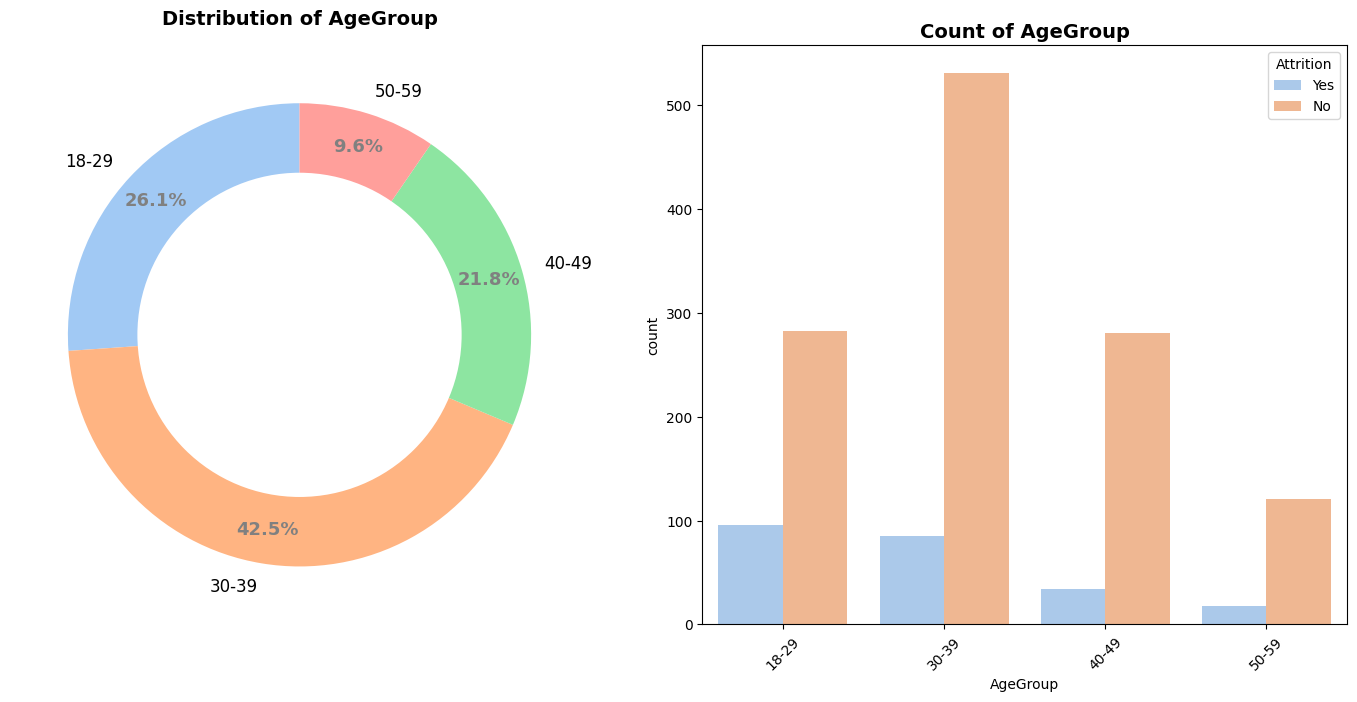

In [87]:
pie_bar_plot(df, 'AgeGroup', hue='Attrition')

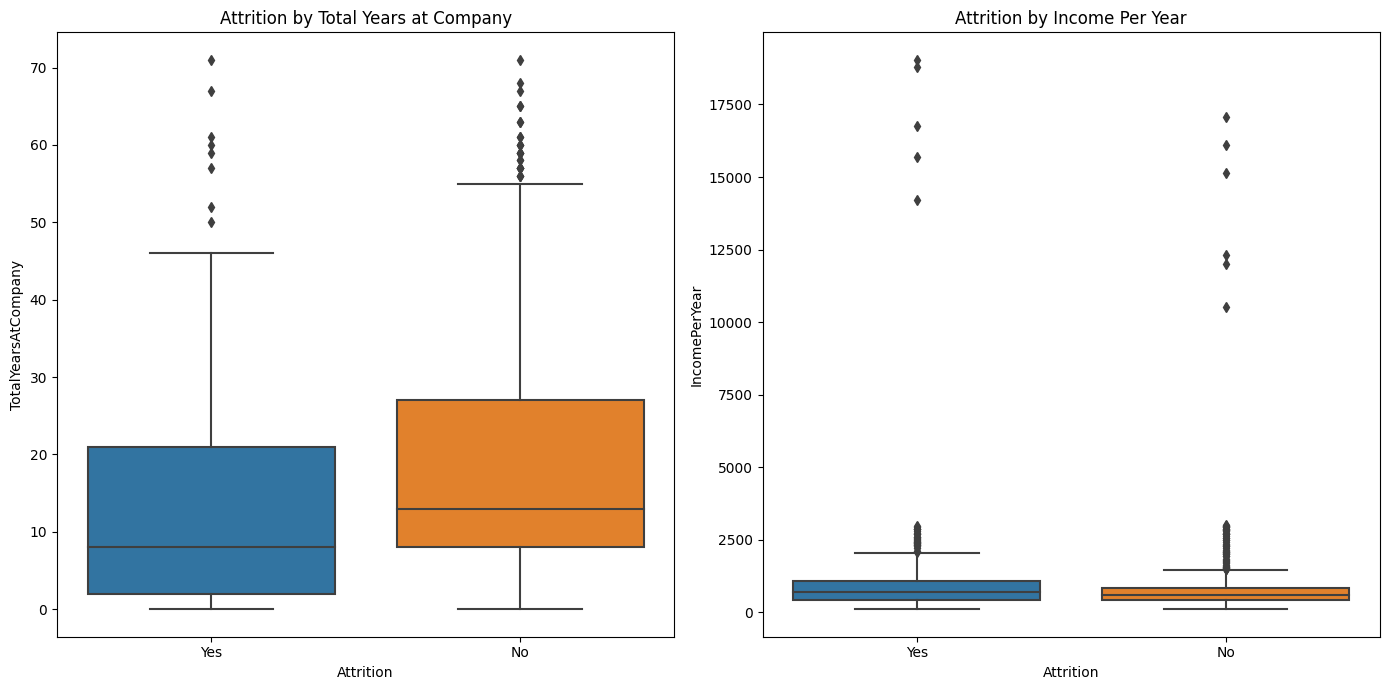

In [93]:
# Assuming 'data' is a pandas DataFrame with the columns 'Attrition', 'TotalYearsAtCompany', and 'IncomePerYear'
# Let's visualize the relationship of 'TotalYearsAtCompany' and 'IncomePerYear' with 'Attrition' using boxplots.

plt.figure(figsize=(14, 7))

# Relationship of 'TotalYearsAtCompany' with 'Attrition'
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='TotalYearsAtCompany', data=df)
plt.title('Attrition by Total Years at Company')

# Relationship of 'IncomePerYear' with 'Attrition'
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='IncomePerYear', data=df)
plt.title('Attrition by Income Per Year')

plt.tight_layout()
plt.show()

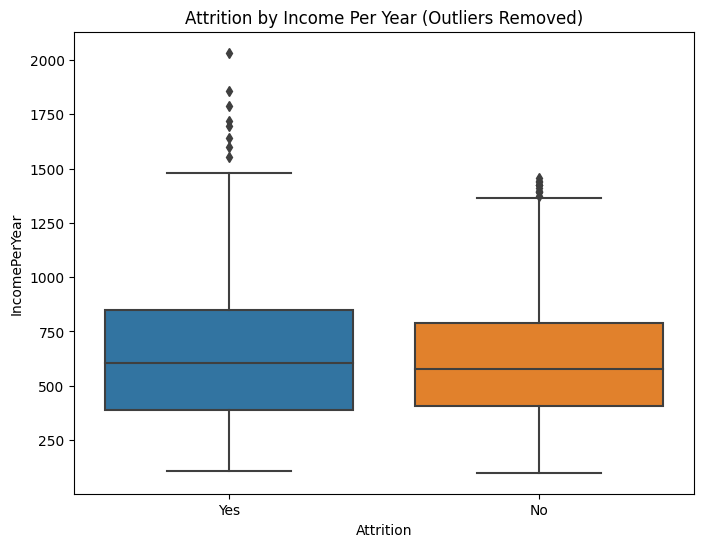

In [95]:
# Separate the data into two groups based on Attrition
attrition_yes = df[df['Attrition'] == 'Yes']['IncomePerYear']
attrition_no = df[df['Attrition'] == 'No']['IncomePerYear']

# Calculate IQR for each group
IQR_yes = attrition_yes.quantile(0.75) - attrition_yes.quantile(0.25)
IQR_no = attrition_no.quantile(0.75) - attrition_no.quantile(0.25)

# Determine bounds for each group
lower_bound_yes = attrition_yes.quantile(0.25) - 1.5 * IQR_yes
upper_bound_yes = attrition_yes.quantile(0.75) + 1.5 * IQR_yes
lower_bound_no = attrition_no.quantile(0.25) - 1.5 * IQR_no
upper_bound_no = attrition_no.quantile(0.75) + 1.5 * IQR_no

# Filter out the outliers
filtered_yes = attrition_yes[(attrition_yes >= lower_bound_yes) & (attrition_yes <= upper_bound_yes)]
filtered_no = attrition_no[(attrition_no >= lower_bound_no) & (attrition_no <= upper_bound_no)]

# Combine the filtered data back into a single DataFrame
filtered_data = pd.concat([
    pd.DataFrame({'Attrition': 'Yes', 'IncomePerYear': filtered_yes}),
    pd.DataFrame({'Attrition': 'No', 'IncomePerYear': filtered_no})
])

# Now plot the boxplot with the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='IncomePerYear', data=filtered_data)
plt.title('Attrition by Income Per Year (Outliers Removed)')
plt.show()